Time series forecasting is challenging, especially when working with long sequences, noisy data, multi-step forecasts and multiple input and output variables.

Deep learning methods offer a lot of promise for time series forecasting, such as the automatic learning of temporal dependence and the automatic handling of temporal structures like trends and seasonality.

Time series data can be phrased as supervised learning.

Given a sequence of numbers for a time series dataset. 

We will discover how to develop a Long Short-Term Memory Neural Network model or LSTM for univariate time series forecasting.

We can define a simple univariate problem as a sequence of integers, fit the model on this sequence and have the model predict the next value in the sequence.

The LSTM model expects three-dimensional input with the shape [samples, timesteps, features]. We will define the data in the form [samples, timesteps] and reshape it accordingly.

We will use one LSTM layer to process each input sub-sequence of 3 time steps, followed by a Dense layer to interpret the summary of the input sequence. The model uses the efficient Adam version of stochastic gradient descent and optimizes the mean squared error (‚Äòmse‚Äò or 'rmse') loss function.

Once the model is defined, it can be fit on the training data and the fit model can be used to make a prediction.

In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns',11)
pd.set_option('display.max_colwidth',30)
pd.set_option('display.width',None)

# What version of Python do you have?
import sys

import keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

In [5]:
h_m_df = pd.read_csv('C:/scripts/capstone2/h_m_df.csv', index_col='DATE', parse_dates=True)
h_m_df.head()

ASPUS_M  H_RATIO_M  HSN1F_M  PERMIT_M  STOCK_MKT_M  BAA10YM  \
DATE                                                                      
1962-01-01  19300.0        4.7      591      1122    -1.194624     1.00   
1962-02-01  19300.0        4.7      591      1194    -4.306072     1.03   
1962-03-01  19300.0        4.7      591      1134    -7.417520     1.11   
1962-04-01  19300.0        4.7      591      1235   -10.528967     1.18   
1962-05-01  19300.0        4.7      591      1142    -9.215257     1.13   

            US10Y_M  RPCE_M  LRUN_UEMP     GDP_M  
DATE                                              
1962-01-01     4.08    4.30   6.536096  7.300000  
1962-02-01     4.04    4.53   6.202647  6.100000  
1962-03-01     3.93    4.77   5.869198  4.900000  
1962-04-01     3.84    5.00   5.535749  3.700000  
1962-05-01     3.87    4.40   5.437348  4.133333

In [6]:
from sklearn.model_selection import train_test_split # for train and test set split
from sklearn.model_selection import cross_val_score #Sklearn.model_seletion is used

# Construct data for the model

X = np.array(h_m_df.drop(['ASPUS_M'],1))
y = np.array(h_m_df['ASPUS_M'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("size of the training feature set is",X_train.shape)
print("size of the test feature set is",X_test.shape)
print("size of the training Target set is",y_train.shape)
print("size of the test Target set is",y_test.shape)


size of the training feature set is (478, 9)
size of the test feature set is (206, 9)
size of the training Target set is (478,)
size of the test Target set is (206,)


In [7]:
data = h_m_df.as_matrix()
print(data)

[[1.93000000e+04 4.70000000e+00 5.91000000e+02 ... 4.30000000e+00
  6.53609578e+00 7.30000000e+00]
 [1.93000000e+04 4.70000000e+00 5.91000000e+02 ... 4.53000000e+00
  6.20264676e+00 6.10000000e+00]
 [1.93000000e+04 4.70000000e+00 5.91000000e+02 ... 4.77000000e+00
  5.86919774e+00 4.90000000e+00]
 ...
 [3.78900000e+05 7.20000000e+00 5.49000000e+02 ... 2.80000000e+00
  3.62318061e+00 2.60000000e+00]
 [3.78900000e+05 6.70000000e+00 5.99000000e+02 ... 2.80000000e+00
  3.62318061e+00 2.60000000e+00]
 [3.78900000e+05 6.60000000e+00 6.21000000e+02 ... 2.80000000e+00
  3.62318061e+00 2.60000000e+00]]


C:\Users\achow\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import tensorflow as tf
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2)

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)
Tensor Flow Version: 1.13.1
Keras Version: 2.2.4

Python 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Pandas 0.23.4
Scikit-Learn 0.20.1


The Rectified Linear Activation Function

As Dan explained to you in the video, an "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

Here are some examples:
relu(3) = 3
relu(-3) = 0


Fill in the definition of the relu() function:
Use the max() function to calculate the value for the output of relu().
Apply the relu() function to node_0_input to calculate node_0_output.
Apply the relu() function to node_1_input to calculate node_1_output.

In [9]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)

    # Return the value just calculated
    return(output)

In [14]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]

weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

168


You predicted 168 transactions. Without this activation function, you would have predicted a negative number! The real power of activation functions will come soon when you start tuning model weights

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])

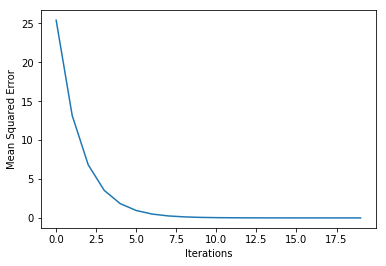

In [17]:
target = 0


n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)

    # Update the weights: weights
    weights = weights - 0.01 * slope

    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)

    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

As you can see, the mean squared error decreases as the number of iterations go up.

# Specifying a model

Now you'll get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.

To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.

As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. You can find the dataset in a pandas dataframe called df. For convenience, everything in df except for the target has been converted to a NumPy matrix called predictors. The target, wage_per_hour, is available as a NumPy matrix called target.

we've imported the Sequential model constructor, the Dense layer constructor, and pandas.

Store the number of columns in the predictors data to n_cols. 
Start by creating a Sequential model called model.
Use the .add() method on model to add a Dense layer.
Add 50 units, specify activation='relu', and the input_shape parameter to be the tuple (n_cols,) which means it has n_cols items in each row of data, and any number of rows of data are acceptable as inputs.
Add another Dense layer. This should have 32 units and a 'relu' activation.
Finally, add an output layer, which is a Dense layer with a single node. Don't use any activation function here.

In [20]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd

housing_df= pd.read_csv('C:/scripts/capstone2/housing_df.csv', index_col=0)
housing_df.head()

ASPUS_3A_PCT_CHG  H_RATIO_3A_PCT_CHG  HSN1F_3A_PCT_CHG  \
DATE                                                               
1/1/1962          0.103627            0.170213         -0.086294   
2/1/1962          0.103627            0.170213         -0.086294   
3/1/1962          0.103627            0.170213         -0.086294   
4/1/1962          0.103627            0.170213         -0.086294   
5/1/1962          0.103627            0.170213         -0.086294   

          PERMIT_3A_PCT_CHG  STOCK_MKT_3A_PCT_CHG  BAA_YEILD_10Y_2A_PCT_CHG  \
DATE                                                                          
1/1/1962           0.037433             -2.848426                     -0.28   
2/1/1962           0.037433             -2.848426                     -0.28   
3/1/1962           0.037433             -2.848426                     -0.28   
4/1/1962           0.037433             -2.848426                     -0.28   
5/1/1962           0.037433             -2.848426                     -0.28   

          US10Y_3A_PCT_CHG  RPCE_A_PCT_CHG  UEMP_3A_PCT_CHG  RGDP_M_PCT_CHG  
DATE                                                                         
1/1/1962           0.02451       -0.116279        -0.207031       -0.164384  
2/1/1962           0.02451       -0.116279        -0.207031       -0.164384  
3/1/1962           0.02451       -0.116279        -0.207031       -0.196721  
4/1/1962           0.02451       -0.116279        -0.207031       -0.244898  
5/1/1962           0.02451       -0.116279        -0.207031        0.117117

In [21]:
predictors = np.array(housing_df.drop(['ASPUS_3A_PCT_CHG'],1))
target = np.array(housing_df['ASPUS_3A_PCT_CHG'])

print(predictors.shape)
print(target.shape)

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

(684, 9)
(684,)
Instructions for updating:
Colocations handled automatically by placer.


# Compiling the model

We're now going to compile the model you specified earlier. To compile the model, you need to specify the optimizer and loss function to use. The Adam optimizer is an excellent choice. 
Here we'll use the Adam optimizer and the mean squared error loss function. 

Compile the model using model.compile(). Your optimizer should be 'adam' and the loss should be 'mean_squared_error'.

In [22]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


# Fitting the model

We'll now fit the model. Recall that the data to be used as predictive features is loaded in a NumPy matrix called predictors and the data to be predicted is stored in a NumPy matrix called target. Your model is pre-written and it has been compiled with the code from the previously compiled.

Fit the model. Remember that the first argument is the predictive features (predictors), and the data to be predicted (target) is the second argument.


In [23]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors, target)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
684/684 [==============================] - 1s 2ms/step - loss: 8.5946


# Classification models

We'll now create a classification model using the housing_df dataset. The predictive variables are stored in a NumPy array predictors. The target to predict is in df.survived, though you'll have to manipulate it for keras. The number of predictive features is stored in n_cols.

Here, we'll use the 'sgd' optimizer, which stands for Stochastic Gradient Descent. 
Convert df.survived to a categorical variable using the to_categorical() function.
Specify a Sequential model called model.
Add a Dense layer with 32 nodes. Use 'relu' as the activation and (n_cols,) as the input_shape.
Add the Dense output layer. Because there are two outcomes, it should have 2 units, and because it is a classification model, the activation should be 'softmax'.
Compile the model, using 'sgd' as the optimizer, 'categorical_crossentropy' as the loss function, and metrics=['accuracy'] to see the accuracy (what fraction of predictions were correct) at the end of each epoch.
Fit the model using the predictors and the target.


In [24]:
# Import necessary modules
import keras
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import to_categorical
print( keras.__version__ )

#from keras.activations import softmax
predictors = np.array(housing_df.drop(['ASPUS_3A_PCT_CHG'],1))
target = np.array(housing_df['ASPUS_3A_PCT_CHG'])

print(predictors.shape)
print(target.shape)

# Set up the model
model = Sequential()
#n_cols=10
# Add the first layer
#model.add(Dense(32, activation='relu', input_shape=((10),)))
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
#model.add( Dense(6, input_shape=(6,), activation = 'softmax' ) )
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['mse'])

# Fit the model
model.fit(predictors, target, epochs=100)

2.2.4
(684, 9)
(684,)
Epoch 1/100
684/684 [==============================] - 1s 1ms/step - loss: 0.0584 - mean_squared_error: 9.3480
Epoch 2/100
684/684 [==============================] - 0s 73us/step - loss: 0.0367 - mean_squared_error: 32.8281
Epoch 3/100
684/684 [==============================] - 0s 141us/step - loss: 0.0241 - mean_squared_error: 41.4474
Epoch 4/100
684/684 [==============================] - 0s 128us/step - loss: 0.0227 - mean_squared_error: 35.6253
Epoch 5/100
684/684 [==============================] - 0s 62us/step - loss: 0.0216 - mean_squared_error: 27.2027
Epoch 6/100
684/684 [==============================] - 0s 86us/step - loss: 0.0204 - mean_squared_error: 13.3389
Epoch 7/100
684/684 [==============================] - 0s 103us/step - loss: 0.0185 - mean_squared_error: 3.2938
Epoch 8/100
684/684 [==============================] - 0s 89us/step - loss: 0.0171 - mean_squared_error: 1.6011
Epoch 9/100
684/684 [==============================] - 0s 99us/step - loss:

# Making predictions

The trained network from your previous coding exercise is now stored as model. New data to make predictions is stored in a NumPy array as pred_data. Use model to make predictions on your new data.

In this exercise, your predictions will be probabilities, which is the most common way for data scientists to communicate their predictions to colleagues.

Create your predictions using the model's .predict() method on pred_data.
Use NumPy indexing to find the column corresponding to predicted probabilities of survival being True. This is the second column (index 1) of predictions. Store the result in predicted_prob_true and print it.

In [27]:
input_data1 = np.array([[   6.6 ,  621.  , 1326.  ,   -5.89,    2.3 ,    2.83,    2.8 ,    3.62,    2.6 ],
       [   5.4 ,  663.  , 1323.  ,    1.44,    1.65,    2.86,    1.6 ,    4.21,    2.87],
       [   5.4 ,  593.  , 1255.  ,    1.81,    2.27,    2.3 ,    2.9 ,    4.28,    3.  ],
       [   5.2 ,  560.  , 1194.  ,    4.71,    2.89,    1.64,    2.93,    4.97,    2.03],
       [   5.1 ,  515.  , 1159.  ,   -4.24,    3.02,    2.17,    2.7 ,    5.15,    0.8 ],
       [   5.3 ,  472.  , 1099.  ,   -1.66,    2.39,    2.3 ,    4.7 ,    5.54,    1.9 ],
       [   5.2 ,  433.  , 1009.  ,    3.44,    2.48,    2.9 ,    2.23,    6.98,    0.4 ],
       [   4.1 ,  447.  ,  979.  ,    6.43,    2.87,    1.98,    1.5 ,    7.96,    2.57],
       [   4.9 ,  354.  ,  732.  ,   -2.73,    3.14,    2.05,    0.6 ,    8.11,    1.7 ],
       [   6.6 ,  301.  ,  636.  ,   -5.66,    2.75,    3.  ,    1.37,    9.12,    0.9 ],
       [   8.8 ,  282.  ,  580.  ,    1.72,    2.96,    2.7 ,    2.77,    9.5 ,    2.67],
       [   7.4 ,  396.  ,  583.  ,    9.37,    2.9 ,    3.39,   -0.6 ,    9.64,    4.5 ],
       [  11.2 ,  377.  ,  554.  ,  -17.51,    6.01,    2.42,   -1.83,    8.17,   -5.73],
       [   9.7 ,  593.  , 1014.  ,   -5.33,    3.08,    3.74,   -0.53,    5.32,   -0.83],
       [   7.4 ,  887.  , 1470.  ,    6.04,    1.7 ,    4.69,    0.7 ,    4.48,    2.3 ],
       [   6.3 , 1074.  , 1867.  ,    0.94,    1.67,    5.11,    2.27,    4.69,    0.7 ],
       [   4.5 , 1255.  , 2219.  ,    3.67,    1.7 ,    4.26,    3.  ,    4.93,    3.27],
       [   3.9 , 1305.  , 2097.  ,    6.89,    2.11,    4.1 ,    4.4 ,    5.2 ,    4.1 ],
       [   4.  , 1129.  , 1987.  ,    8.57,    2.33,    4.27,    3.3 ,    5.99,    3.03],
       [   4.5 ,  936.  , 1854.  ,    0.67,    3.16,    3.9 ,    2.8 ,    6.31,    2.63],
       [   4.3 ,  936.  , 1669.  ,   -2.54,    2.82,    5.21,    2.1 ,    5.82,    2.4 ],
       [   4.2 ,  882.  , 1626.  ,   -4.33,    2.69,    5.28,    1.23,    4.69,   -0.33],
       [   4.4 ,  848.  , 1552.  ,    0.93,    2.43,    5.83,    3.83,    3.93,    1.17],
       [   4.2 ,  872.  , 1649.  ,   -0.33,    2.27,    6.11,    6.  ,    3.84,    7.  ],
       [   3.8 ,  949.  , 1742.  ,    5.89,    2.58,    4.65,    4.57,    4.51,    4.73],
       [   3.9 ,  866.  , 1647.  ,    7.12,    1.68,    5.57,    5.13,    4.87,    4.  ],
       [   4.7 ,  744.  , 1421.  ,    4.24,    1.45,    6.89,    1.8 ,    4.96,    6.8 ],
       [   6.  ,  721.  , 1429.  ,    1.27,    1.49,    6.91,    3.07,    5.34,    4.67],
       [   6.1 ,  701.  , 1386.  ,    6.74,    1.7 ,    6.49,    3.4 ,    5.53,    3.23],
       [   5.6 ,  715.  , 1397.  ,   -0.87,    1.46,    7.74,    4.4 ,    5.31,    4.7 ],
       [   4.5 ,  812.  , 1461.  ,    1.61,    1.92,    5.77,    4.33,    6.91,    4.47],
       [   5.3 ,  604.  , 1148.  ,    3.35,    2.13,    6.26,    2.23,    7.61,    1.23],
       [   6.1 ,  546.  , 1054.  ,   -0.71,    1.73,    7.48,    2.7 ,    7.59,    4.4 ],
       [   7.  ,  516.  ,  964.  ,    3.77,    1.68,    8.28,    2.47,    6.8 ,    2.4 ],
       [   8.2 ,  528.  , 1069.  ,   -4.5 ,    1.66,    8.75,    0.07,    5.7 ,   -1.  ],
       [   6.9 ,  645.  , 1365.  ,    0.44,    1.8 ,    8.01,    1.8 ,    5.16,    0.8 ],
       [   6.8 ,  658.  , 1501.  ,    4.54,    1.54,    9.11,    2.8 ,    5.52,    4.53],
       [   6.6 ,  663.  , 1438.  ,    1.8 ,    2.41,    8.21,    5.87,    6.  ,    3.2 ],
       [   6.  ,  735.  , 1601.  ,    3.9 ,    2.02,    8.02,    5.6 ,    6.31,    4.4 ],
       [   5.7 ,  728.  , 1790.  ,    3.19,    2.54,    7.8 ,    6.33,    7.02,    3.2 ],
       [   5.8 ,  726.  , 1808.  ,    2.65,    2.17,   10.33,    5.5 ,    7.05,    5.13],
       [   6.  ,  687.  , 1490.  ,    3.21,    1.78,   12.16,    5.3 ,    7.06,    3.3 ],
       [   4.7 ,  773.  , 1627.  ,   -2.26,    1.92,   11.83,    4.43,    8.49,    8.27],
       [   5.6 ,  562.  , 1471.  ,    8.87,    3.23,   10.72,    5.47,   10.97,    6.73],
       [   9.4 ,  339.  ,  888.  ,   -0.41,    2.91,   13.87,    1.2 ,    9.49,    1.8 ],
       [   9.2 ,  415.  ,  976.  ,   -2.84,    2.33,   13.47,    1.27,    7.41,    2.3 ],
       [   6.  ,  659.  , 1367.  ,   12.55,    2.05,   11.1 ,    4.83,    7.5 ,    2.23],
       [   7.4 ,  670.  , 1481.  ,   -0.78,    1.1 ,   10.3 ,    1.  ,    5.73,    1.  ],
       [   6.1 ,  805.  , 1818.  ,   -0.  ,    0.93,    9.01,    2.5 ,    6.14,    2.3 ],
       [   6.3 ,  791.  , 1736.  ,    0.05,    1.17,    8.03,    4.47,    6.59,    6.33],
       [   5.5 ,  799.  , 1660.  ,   -2.23,    1.7 ,    7.37,    2.2 ,    7.01,    8.  ],
       [   6.9 ,  591.  , 1188.  ,    2.65,    2.03,    7.86,    4.1 ,    7.61,    2.47],
       [   6.8 ,  566.  ,  994.  ,   -0.53,    2.19,    8.4 ,    5.33,    8.24,    6.5 ],
       [   9.8 ,  448.  ,  824.  ,   -7.41,    2.58,    7.9 ,   -5.7 ,    6.24,   -1.5 ],
       [  10.1 ,  519.  , 1288.  ,   -5.12,    1.74,    6.74,   -2.73,    5.26,   -1.  ],
       [   6.8 ,  737.  , 2226.  ,   -3.2 ,    1.33,    6.64,    4.93,    5.31,    8.33],
       [   5.8 ,  684.  , 2139.  ,    2.71,    2.05,    6.19,    7.8 ,    5.68,    9.4 ],
       [   4.7 ,  646.  , 1903.  ,   -0.  ,    2.23,    6.52,    3.37,    6.02,    2.93],
       [   5.1 ,  515.  , 1394.  ,    2.23,    1.91,    7.53,    1.97,    5.34,    1.07],
       [   7.  ,  401.  , 1216.  ,    0.72,    1.12,    7.1 ,    3.2 ,    3.39,   -1.9 ],
       [   5.2 ,  511.  , 1389.  ,   -0.76,    1.2 ,    6.03,    3.6 ,    3.49,    4.8 ],
       [   4.1 ,  543.  , 1342.  ,    0.69,    1.24,    5.56,    8.67,    3.89,    7.9 ],
       [   4.9 ,  479.  , 1035.  ,    6.04,    1.24,    4.59,    5.6 ,    3.81,    0.2 ],
       [   6.  ,  434.  ,  956.  ,   -6.44,    0.77,    4.81,    3.47,    3.78,    2.73],
       [   4.6 ,  615.  , 1249.  ,    1.41,    0.63,    4.25,    8.57,    4.07,    9.3 ],
       [   5.3 ,  583.  , 1230.  ,    2.63,    0.62,    4.19,    1.1 ,    4.58,    1.2 ],
       [   6.1 ,  514.  , 1423.  ,    5.44,    0.72,    4.13,    6.53,    5.87,    6.67],
       [   6.6 ,  464.  , 1212.  ,    8.  ,    0.97,    3.92,    3.13,    6.4 ,    4.47],
       [   4.7 ,  591.  , 1235.  ,  -10.53,    1.18,    3.84,    5.  ,    5.54,    3.7 ]])


In [30]:
predictors = np.array(h_m_df.drop(['ASPUS_M'],1))
target = np.array(h_m_df['ASPUS_M'])

model = Sequential()
model.add(Dense(32, activation='relu', input_shape = ((n_cols),)))
model.add(Dense(1, activation='softmax'))
#model.compile(optimizer='sgd',              loss='categorical_crossentropy',              metrics=['accuracy'])

model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['mse'])

model.fit(predictors, target, epochs=30)

# Calculate predictions: predictions
predictions = model.predict(input_data1)

# print predictions
print(predictions)


Epoch 1/30
684/684 [==============================] - 1s 2ms/step - loss: 119.7935 - mean_squared_error: 37082326213.6140
Epoch 2/30
684/684 [==============================] - 0s 128us/step - loss: 119.7935 - mean_squared_error: 37082325267.4620
Epoch 3/30
684/684 [==============================] - 0s 111us/step - loss: 119.7935 - mean_squared_error: 37082325327.3450
Epoch 4/30
684/684 [==============================] - 0s 166us/step - loss: 119.7935 - mean_squared_error: 37082325914.1988
Epoch 5/30
684/684 [==============================] - 0s 46us/step - loss: 119.7935 - mean_squared_error: 37082325806.4094
Epoch 6/30
684/684 [==============================] - 0s 46us/step - loss: 119.7935 - mean_squared_error: 37082325710.5965
Epoch 7/30
684/684 [==============================] - 0s 135us/step - loss: 119.7935 - mean_squared_error: 37082325542.9240
Epoch 8/30
684/684 [==============================] - 0s 91us/step - loss: 119.7935 - mean_squared_error: 37082325255.4854
Epoch 9/30
68

Mean Squared Error is very big

# mlp for regression with mae loss function

In [32]:
# mlp for regression with mae loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
from sklearn.model_selection import train_test_split # for train and test set split
from sklearn.model_selection import cross_val_score #Sklearn.model_seletion is used

# Construct data for the model
type(housing_df)
#type(model)
housing_df.info()
X = np.array(housing_df.drop(['ASPUS_3A_PCT_CHG'],1))
y = np.array(housing_df['ASPUS_3A_PCT_CHG'])

X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("size of the training feature set is",X_train.shape)
print("size of the test feature set is",X_test.shape)
print("size of the training Target set is",y_train.shape)
print("size of the test Target set is",y_test.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 1/1/1962 to 12/1/2018
Data columns (total 10 columns):
ASPUS_3A_PCT_CHG            684 non-null float64
H_RATIO_3A_PCT_CHG          684 non-null float64
HSN1F_3A_PCT_CHG            684 non-null float64
PERMIT_3A_PCT_CHG           684 non-null float64
STOCK_MKT_3A_PCT_CHG        684 non-null float64
BAA_YEILD_10Y_2A_PCT_CHG    684 non-null float64
US10Y_3A_PCT_CHG            684 non-null float64
RPCE_A_PCT_CHG              684 non-null float64
UEMP_3A_PCT_CHG             684 non-null float64
RGDP_M_PCT_CHG              684 non-null float64
dtypes: float64(10)
memory usage: 58.8+ KB
size of the training feature set is (547, 9)
size of the test feature set is (137, 9)
size of the training Target set is (547,)
size of the test Target set is (137,)


Train: 0.203, Test: 1.193


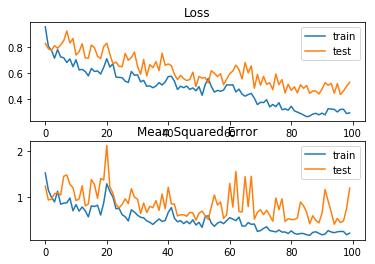

In [33]:
# standardize dataset
# split into train and test
n_cols=9
# define model
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform', input_shape = ((n_cols),)))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.001, momentum=0.99)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mean_squared_error'], label='train')
pyplot.plot(history.history['val_mean_squared_error'], label='test')
pyplot.legend()
pyplot.show()

# Housing price Prediction_Using_CNN

In [34]:
h_m_df = pd.read_csv('C:/scripts/capstone2/h_m_df.csv', index_col='DATE', parse_dates=True)
h_m_df.head()

ASPUS_M  H_RATIO_M  HSN1F_M  PERMIT_M  STOCK_MKT_M  BAA10YM  \
DATE                                                                      
1962-01-01  19300.0        4.7      591      1122    -1.194624     1.00   
1962-02-01  19300.0        4.7      591      1194    -4.306072     1.03   
1962-03-01  19300.0        4.7      591      1134    -7.417520     1.11   
1962-04-01  19300.0        4.7      591      1235   -10.528967     1.18   
1962-05-01  19300.0        4.7      591      1142    -9.215257     1.13   

            US10Y_M  RPCE_M  LRUN_UEMP     GDP_M  
DATE                                              
1962-01-01     4.08    4.30   6.536096  7.300000  
1962-02-01     4.04    4.53   6.202647  6.100000  
1962-03-01     3.93    4.77   5.869198  4.900000  
1962-04-01     3.84    5.00   5.535749  3.700000  
1962-05-01     3.87    4.40   5.437348  4.133333

In [53]:
# mlp for regression with mae loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
from sklearn import metrics
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

# generate regression dataset
from sklearn.model_selection import train_test_split # for train and test set split
from sklearn.model_selection import cross_val_score #Sklearn.model_seletion is used

# Construct data for the model
type(h_m_df)
#type(model)
h_m_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 684 entries, 1962-01-01 to 2018-12-01
Data columns (total 10 columns):
ASPUS_M        684 non-null float64
H_RATIO_M      684 non-null float64
HSN1F_M        684 non-null int64
PERMIT_M       684 non-null int64
STOCK_MKT_M    684 non-null float64
BAA10YM        684 non-null float64
US10Y_M        684 non-null float64
RPCE_M         684 non-null float64
LRUN_UEMP      684 non-null float64
GDP_M          684 non-null float64
dtypes: float64(8), int64(2)
memory usage: 58.8 KB


In [54]:
X = np.array(h_m_df.drop(['ASPUS_M'],1))
y = np.array(h_m_df['ASPUS_M'])


In [55]:
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
y = sc.fit_transform(y.reshape(len(y),1))[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("size of the training feature set is",X_train.shape)
print("size of the test feature set is",X_test.shape)
print("size of the training Target set is",y_train.shape)
print("size of the test Target set is",y_test.shape)


size of the training feature set is (547, 9)
size of the test feature set is (137, 9)
size of the training Target set is (547,)
size of the test Target set is (137,)


# Split data to training set and test set
Split data into training (60%) and test sets (40%).



In [40]:
data = h_m_df.as_matrix()
df = []
for index in range(len(data) - 31):
    df.append(data[index: index + 31])
df = np.array(df)

splitRow = round(0.6 * df.shape[0])

C:\Users\achow\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [42]:
## Training (60%)
train = df[:int(splitRow), :]
X_train = train[:, :-1] # all data until day 30
y_train = train[:, -1][:,-1] # day 31 close price
print('Training set:', train.shape[0], 'obs')

Training set: 392 obs


In [43]:
## Test (40%)
test = df[int(splitRow):, :]
X_test = test[:, :-1] # all data until day 30
y_test = test[:, -1][:,-1] # day 31 close price
print('Test set:', test.shape[0], 'obs')

Test set: 261 obs


In [44]:
print(h_m_df.shape)
print("size of the training feature set is",X_train.shape)
print("size of the test feature set is",X_test.shape)
print("size of the training Target set is",y_train.shape)
print("size of the test Target set is",y_test.shape)

(684, 10)
size of the training feature set is (392, 30, 10)
size of the test feature set is (261, 30, 10)
size of the training Target set is (392,)
size of the test Target set is (261,)


# Modeling
Now predict the close price for day ùëö n

based on data observed in the past 30 days 

{ùëö‚àí30,ùëö‚àí29,...ùëö‚àí1}

{m‚àí30,m‚àí29,...m‚àí1}

# Define Network
Define a Sequential Model and add:

input layer with dimension (30, 6);

two LSTM layers with 256 neurons;

one hidden layers with 32 neurons with 'Relu';

one linear output layer.


In [45]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import Adam 

# Split into train/test
model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(50, activation='relu')) # Hidden 2
model.add(Dense(1,activation='softmax')) # Output

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.fit(X,y,verbose=1,epochs=100)

model.summary()

print(model.summary())

Epoch 1/100
684/684 [==============================] - 1s 2ms/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 2/100
684/684 [==============================] - 0s 141us/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 3/100
684/684 [==============================] - 0s 207us/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 4/100
684/684 [==============================] - 0s 169us/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 5/100
684/684 [==============================] - 0s 120us/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 6/100
684/684 [==============================] - 0s 273us/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 7/100
684/684 [==============================] - 0s 137us/step - loss: 0.4963 - mean_squared_error: 0.49630s - loss: 0.5031 - mean_squared_error: 0.50
Epoch 8/100
684/684 [==============================] - 0s 159us/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 9/100
684/684 [==============================] -

# Compile Network¬∂
Before training, configure the learning process by specifying:
    
Optimizer to be 'adam';

Loss function to be 'mse';

Evaluation metric to be 'accuracy'.

In [56]:
decay = .001
import tensorflow as tf
import keras
adam = keras.optimizers.Adam(decay=decay)
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])


# Train Network¬∂
Fit the model to training data to learn the parameters.

In [58]:
model.fit(X,y,
    batch_size=512,
    epochs=100,
    validation_split=0.2,
    verbose=1)

Train on 547 samples, validate on 137 samples
Epoch 1/100
547/547 [==============================] - 0s 413us/step - loss: 0.6064 - acc: 0.0000e+00 - val_loss: 0.0566 - val_acc: 0.0073
Epoch 2/100
547/547 [==============================] - 0s 218us/step - loss: 0.6064 - acc: 0.0000e+00 - val_loss: 0.0566 - val_acc: 0.0073
Epoch 3/100
547/547 [==============================] - 0s 203us/step - loss: 0.6064 - acc: 0.0000e+00 - val_loss: 0.0566 - val_acc: 0.0073
Epoch 4/100
547/547 [==============================] - 0s 218us/step - loss: 0.6064 - acc: 0.0000e+00 - val_loss: 0.0566 - val_acc: 0.0073
Epoch 5/100
547/547 [==============================] - 0s 134us/step - loss: 0.6064 - acc: 0.0000e+00 - val_loss: 0.0566 - val_acc: 0.0073
Epoch 6/100
547/547 [==============================] - 0s 29us/step - loss: 0.6064 - acc: 0.0000e+00 - val_loss: 0.0566 - val_acc: 0.0073
Epoch 7/100
547/547 [==============================] - 0s 40us/step - loss: 0.6064 - acc: 0.0000e+00 - val_loss: 0.0566 -

In [59]:
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
y = sc.fit_transform(y.reshape(len(y),1))[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("size of the training feature set is",X_train.shape)
print("size of the test feature set is",X_test.shape)
print("size of the training Target set is",y_train.shape)
print("size of the test Target set is",y_test.shape)

size of the training feature set is (547, 9)
size of the test feature set is (137, 9)
size of the training Target set is (547,)
size of the test Target set is (137,)


In [60]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import Adam 

# Split into train/test
model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(50, activation='relu')) # Hidden 2
model.add(Dense(1,activation='softmax')) # Output

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.fit(X,y,verbose=1,epochs=100)

model.summary()

print(model.summary())

Epoch 1/100
684/684 [==============================] - 4s 5ms/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 2/100
684/684 [==============================] - 0s 176us/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 3/100
684/684 [==============================] - 0s 180us/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 4/100
684/684 [==============================] - 0s 172us/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 5/100
684/684 [==============================] - 0s 207us/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 6/100
684/684 [==============================] - 0s 163us/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 7/100
684/684 [==============================] - 0s 142us/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 8/100
684/684 [==============================] - 0s 151us/step - loss: 0.4963 - mean_squared_error: 0.4963
Epoch 9/100
684/684 [==============================] - 0s 169us/step - loss: 0.4963 - mean_squared

In [61]:
decay = .001
import tensorflow as tf
import keras
adam = keras.optimizers.Adam(decay=decay)
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])


In [62]:
model.fit(X_train, y_train,
    batch_size=512,
    epochs=100,
    validation_split=0.2,
    verbose=2)

Train on 437 samples, validate on 110 samples
Epoch 1/100
 - 1s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_

Epoch 93/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 95/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 96/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 97/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 98/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 99/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00
Epoch 100/100
 - 0s - loss: 0.4993 - acc: 0.0023 - val_loss: 0.4769 - val_acc: 0.0000e+00


# Evaluate Network
Evaluate model on the test set

In [78]:
mse = model.evaluate(X_test, y_test)
print("mean square error = ", mse)
acc = model.evaluate(X_test, y_test)
print("Accuracy = ", acc)

#X_test = X_test.reshape(-1,1)
model.compile(optimizer="Nadam", loss="mean_squared_error", metrics=["mean_squared_error", 'accuracy', r_sq, rmse])
# enable early stopping based on mean_squared_error
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#result1= model.fit(X,y,verbose=2,epochs=120)
#, batch_size=5, validation_data=(X_test, y_test)
# fit model
result = model.fit(X_train,y_train,verbose=2,epochs=120, batch_size=5, validation_data=(X_test, y_test), callbacks=[earlystopping])
# get predictions
y_pred = model.predict(X_test)

137/137 [==============================] - 0s 4ms/step
mean square error =  [0.50225049866377, 0.50225049866377, 0.0]
137/137 [==============================] - 0s 676us/step
Accuracy =  [0.50225049866377, 0.50225049866377, 0.0]
Train on 547 samples, validate on 137 samples
Epoch 1/120
 - 3s - loss: 0.4948 - mean_squared_error: 0.4948 - acc: 0.0018 - r_sq: -1.2534e+01 - rmse: 0.6397 - val_loss: 0.5023 - val_mean_squared_error: 0.5023 - val_acc: 0.0000e+00 - val_r_sq: -1.7943e+01 - val_rmse: 0.6389
Epoch 2/120
 - 0s - loss: 0.4948 - mean_squared_error: 0.4948 - acc: 0.0018 - r_sq: -1.1915e+01 - rmse: 0.6397 - val_loss: 0.5023 - val_mean_squared_error: 0.5023 - val_acc: 0.0000e+00 - val_r_sq: -1.7943e+01 - val_rmse: 0.6389
Epoch 3/120
 - 0s - loss: 0.4948 - mean_squared_error: 0.4948 - acc: 0.0018 - r_sq: -6.7315e+02 - rmse: 0.6397 - val_loss: 0.5023 - val_mean_squared_error: 0.5023 - val_acc: 0.0000e+00 - val_r_sq: -1.7943e+01 - val_rmse: 0.6389
Epoch 4/120
 - 0s - loss: 0.4948 - mean_s

Epoch 36/120
 - 0s - loss: 0.4948 - mean_squared_error: 0.4948 - acc: 0.0018 - r_sq: -1.2812e+01 - rmse: 0.6397 - val_loss: 0.5023 - val_mean_squared_error: 0.5023 - val_acc: 0.0000e+00 - val_r_sq: -1.7943e+01 - val_rmse: 0.6389
Epoch 37/120
 - 0s - loss: 0.4948 - mean_squared_error: 0.4948 - acc: 0.0018 - r_sq: -1.1145e+01 - rmse: 0.6397 - val_loss: 0.5023 - val_mean_squared_error: 0.5023 - val_acc: 0.0000e+00 - val_r_sq: -1.7943e+01 - val_rmse: 0.6389
Epoch 38/120
 - 0s - loss: 0.4948 - mean_squared_error: 0.4948 - acc: 0.0018 - r_sq: -1.0365e+01 - rmse: 0.6397 - val_loss: 0.5023 - val_mean_squared_error: 0.5023 - val_acc: 0.0000e+00 - val_r_sq: -1.7943e+01 - val_rmse: 0.6389
Epoch 39/120
 - 0s - loss: 0.4948 - mean_squared_error: 0.4948 - acc: 0.0018 - r_sq: -1.0771e+02 - rmse: 0.6397 - val_loss: 0.5023 - val_mean_squared_error: 0.5023 - val_acc: 0.0000e+00 - val_r_sq: -1.7943e+01 - val_rmse: 0.6389
Epoch 40/120
 - 0s - loss: 0.4948 - mean_squared_error: 0.4948 - acc: 0.0018 - r_sq:

In [80]:
from keras import backend as K

# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)


def r_sq(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [81]:
def r_sq(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

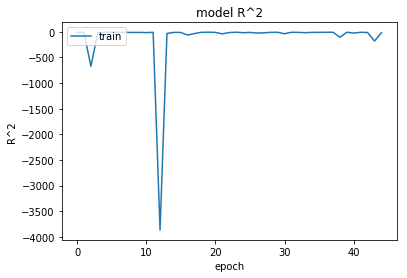

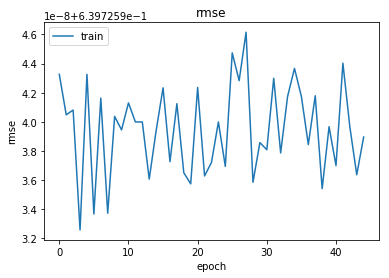

In [82]:
#--------------------------
# Plot learning curves including R^2 and RMSE
#-----------------------------------------------------------------------------
# plot training curve for R^2 (beware of scale, starts very low negative)
#plt.plot(result1.history['val_r_square'])
plt.plot(result.history['r_sq'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
plt.plot(result.history['rmse'])
#plt.plot(result1.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# LSTM-RNN to forecast time-series

RNN‚Äôs (LSTM‚Äôs) are pretty good at extracting patterns in input feature space, where the input data spans over long sequences. Given the gated architecture of LSTM‚Äôs that has this ability to manipulate its memory state, they are ideal for such problems.

‚Ä¢	LSTMs can almost seamlessly model problems with multiple input variables. All we need is a 3D input vector that needs to be fed into the input shape of the LSTM. So long as we figure out a way to convert all our input variables to be represented in a 3D vector form, we are good use LSTM. This adds a great benefit in time series forecasting, where classical linear methods can be difficult to adapt to multivariate or multiple input forecasting problems (A side note here for multivariate forecasting‚Ää‚Äî‚Ääkeep in mind that when we use multivariate data for forecasting, then we also need ‚Äúfuture multi-variate‚Äù data to predict the future outcome!)

‚Ä¢	In general, while using LSTM‚Äôs, I found that they offer lot of flexibility in modelling the problem‚Ää‚Äî‚Äämeaning we have a good control over several parameters of the time series. 


In [83]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
# generate regression dataset
from sklearn.model_selection import train_test_split # for train and test set split
from sklearn.model_selection import cross_val_score 

import pandas as pd
import numpy as np
h_m_df = pd.read_csv('C:/scripts/capstone2/h_m_df.csv')
X = np.array(h_m_df.drop(['ASPUS_M'],1))
y = np.array(h_m_df['ASPUS_M'])


In [84]:
n_sample = h_m_df.shape[0]

n_train=int(0.8*n_sample)+1
n_forecast=n_sample-n_train
#ts_df
dataset_train = h_m_df.iloc[:n_train]['ASPUS_M']
dataset_test = h_m_df.iloc[n_train:]['ASPUS_M']
print(dataset_train.shape)
print(dataset_test.shape)
print("Training Series Tail:", "\n", dataset_train.tail(), "\n")
print("Testing Series Head:", "\n", dataset_test.head())

(548,)
(136,)
Training Series Tail: 
 543    310100.0000
544    307133.3333
545    304166.6667
546    301200.0000
547    302733.3333
Name: ASPUS_M, dtype: float64 

Testing Series Head: 
 548    304266.6667
549    305800.0000
550    300666.6667
551    295533.3333
552    290400.0000
Name: ASPUS_M, dtype: float64


In [87]:
# Recurrent Neural Network
type(dataset_train)

# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [89]:
# Importing the training set & Test Set

training_set = dataset_train.values.reshape(-1, 1)
test_set = dataset_test.values.reshape(-1, 1)
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(test_set)

In [90]:
# Creating a 3D data structure 
X_train = []
y_train = []
for i in range(6, 548):
    X_train.append(training_set_scaled[i-6:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
y_test = []
for i in range(6, 136):
    X_test.append(test_set_scaled[i-6:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


print("size of the training feature set is",X_train.shape)
print("size of the test feature set is",X_test.shape)
print("size of the training Target set is",y_train.shape)
print("size of the test Target set is",y_test.shape)


size of the training feature set is (542, 6, 1)
size of the test feature set is (130, 6, 1)
size of the training Target set is (542,)
size of the test Target set is (130,)


In [91]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU

from keras import backend as K

# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)


def r_sq(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [92]:
decay = .001
import tensorflow as tf
import keras
adam = keras.optimizers.Adam(decay=decay)


In [93]:
# Initialising the RNN
regressor = Sequential()
#regressor.add(BatchNormalization())
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 200, activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.3))


# now add a ReLU layer explicitly:
regressor.add(LeakyReLU(alpha=0.05))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150,  return_sequences = True)) #activation='sigmoid'
regressor.add(Dropout(0.3))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

# Adding the output layer
regressor.add(Dense(units = 1, activation='sigmoid')) #, activation='sigmoid'

# Compiling the RNN
#regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=[r_sq])

#opt = SGD(lr=0.0001, momentum=0.9, decay=0.01)

regressor.compile(optimizer='adam', loss=rmse, metrics=[rmse, r_sq])
# enable early stopping based on mean_squared_error
earlystopping=EarlyStopping(monitor="r_sq", patience=100, verbose=1, mode='auto')
# fit model validation_data=(X_test, y_test)
result = regressor.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[earlystopping])

# Fitting the RNN to the Training set
#regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

print(regressor.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 542 samples, validate on 130 samples
Epoch 1/1000
542/542 [==============================] - 11s 20ms/step - loss: 0.2513 - rmse: 0.2513 - r_sq: -0.2522 - val_loss: 0.2576 - val_rmse: 0.2576 - val_r_sq: -69416.8697
Epoch 2/1000
542/542 [==============================] - 1s 2ms/step - loss: 0.1038 - rmse: 0.1038 - r_sq: 0.7263 - val_loss: 0.0900 - val_rmse: 0.0900 - val_r_sq: -1935.4023
Epoch 3/1000
542/542 [==============================] - 1s 2ms/step - loss: 0.0552 - rmse: 0.0552 - r_sq: 0.9207 - val_loss: 0.0860 - val_rmse: 0.0860 - val_r_sq: -4536.1880
Epoch 4/1000
542/542 [==============================] - 1s 2ms/step - loss: 0.0432 - rmse: 0.0432 - r_sq: 0.9527 - val_loss: 0.0740 - val_rmse: 0.0740 - val_r_sq: -2378.2724
Epoch 5/1000
542/542 [==============================] - 1s 2ms/step - loss: 0.0379 - rmse: 0.0379 - r_sq: 0.9612 - val_loss: 0.0677 - val_r

Epoch 46/1000
542/542 [==============================] - 1s 2ms/step - loss: 0.0174 - rmse: 0.0174 - r_sq: 0.9926 - val_loss: 0.0637 - val_rmse: 0.0637 - val_r_sq: -1218.2565
Epoch 47/1000
542/542 [==============================] - 1s 2ms/step - loss: 0.0167 - rmse: 0.0167 - r_sq: 0.9928 - val_loss: 0.0631 - val_rmse: 0.0631 - val_r_sq: -2208.7649
Epoch 48/1000
542/542 [==============================] - 1s 2ms/step - loss: 0.0172 - rmse: 0.0172 - r_sq: 0.9925 - val_loss: 0.0662 - val_rmse: 0.0662 - val_r_sq: -526.8314
Epoch 49/1000
542/542 [==============================] - 1s 2ms/step - loss: 0.0164 - rmse: 0.0164 - r_sq: 0.9932 - val_loss: 0.0635 - val_rmse: 0.0635 - val_r_sq: -2966.1755
Epoch 50/1000
542/542 [==============================] - 2s 3ms/step - loss: 0.0160 - rmse: 0.0160 - r_sq: 0.9931 - val_loss: 0.0637 - val_rmse: 0.0637 - val_r_sq: -1549.3922
Epoch 51/1000
542/542 [==============================] - 1s 3ms/step - loss: 0.0173 - rmse: 0.0173 - r_sq: 0.9922 - val_loss: 

Epoch 93/1000
542/542 [==============================] - 1s 2ms/step - loss: 0.0139 - rmse: 0.0139 - r_sq: 0.9944 - val_loss: 0.0591 - val_rmse: 0.0591 - val_r_sq: -1910.9242
Epoch 94/1000
542/542 [==============================] - 1s 2ms/step - loss: 0.0147 - rmse: 0.0147 - r_sq: 0.9943 - val_loss: 0.0583 - val_rmse: 0.0583 - val_r_sq: -2117.6895
Epoch 95/1000
542/542 [==============================] - 1s 2ms/step - loss: 0.0152 - rmse: 0.0152 - r_sq: 0.9941 - val_loss: 0.0600 - val_rmse: 0.0600 - val_r_sq: -2539.4647
Epoch 96/1000
542/542 [==============================] - 1s 2ms/step - loss: 0.0136 - rmse: 0.0136 - r_sq: 0.9949 - val_loss: 0.0597 - val_rmse: 0.0597 - val_r_sq: -1373.7325
Epoch 97/1000
542/542 [==============================] - 1s 2ms/step - loss: 0.0143 - rmse: 0.0143 - r_sq: 0.9945 - val_loss: 0.0604 - val_rmse: 0.0604 - val_r_sq: -3032.6938
Epoch 98/1000
542/542 [==============================] - 1s 2ms/step - loss: 0.0145 - rmse: 0.0145 - r_sq: 0.9944 - val_loss:

In [94]:
# root mean squared error (rmse) for regression (only for Keras tensors)
# Get accuracy of model on validation data. It's not AUC but it's something at least!

score = regressor.evaluate(X_test,y_test, batch_size=32)
print('Test accuracy:', score)
# Part 3 - Making the predictions and visualising the results

# Getting the real Housing price of 2017

real_housing_price = test_set
#dataset_train['ASPUS_M']
# Getting the predicted Housing price of 2017
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 6:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(6, 142):
    X_test.append(inputs[i-6:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_housing_price = regressor.predict(X_test)
predicted_housing_price = sc.inverse_transform(predicted_housing_price)

print(predicted_housing_price.shape)

130/130 [==============================] - 0s 721us/step
Test accuracy: [0.05952094609920795, 0.05952094609920795, -1553.0401310407199]
(136, 1)


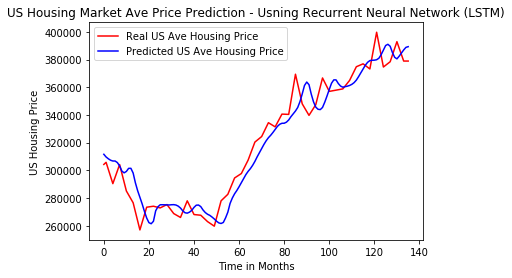

In [95]:
# Visualising the results
plt.plot(real_housing_price, color = 'red', label = 'Real US Ave Housing Price')
plt.plot(predicted_housing_price, color = 'blue', label = 'Predicted US Ave Housing Price')
plt.title('US Housing Market Ave Price Prediction - Usning Recurrent Neural Network (LSTM)')
plt.xlabel('Time in Months')
plt.ylabel('US Housing Price')
plt.legend()
plt.show()

Model is predicting very close to actual ave housing price. R^2 value is over 99

R^2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R^2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.

Values of R^2 outside the range 0 to 1 can occur when the model fits the data worse than a horizontal hyperplane. This would occur when the wrong model was chosen, or nonsensical constraints were applied by mistake. If equation 1 of Kv√•lseth[11] is used (this is the equation used most often), R^2 can be less than zero. 

Both Actual price and Predicted price is indicating that overheated housing market is slowing down. Pick Ave Housing Price was 400000 and now down to 378000. We can see 5.5% down from High Price.

# Plot learning curves including R^2 and RMSE

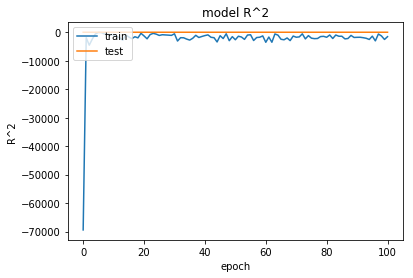

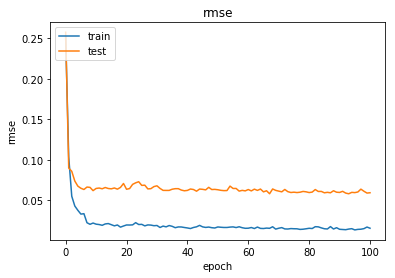

In [96]:
# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(result.history['val_r_sq'])
plt.plot(result.history['r_sq'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Test Accuracy

In [142]:
from tensorflow import set_random_seed
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

import random
# set the seeds for reproducible results with TF (wont work with GPU, only CPU)
np.random.seed(12345)
# set the TF seed
set_random_seed(12345)
# Import data, assign seed for same results, do train/test split 80/20

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
from keras import backend as K

def r_sq(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


# generate regression dataset
from sklearn.model_selection import train_test_split # for train and test set split
from sklearn.model_selection import cross_val_score #Sklearn.model_seletion is used

# Construct data for the model
type(housing_df)
#type(model)
housing_df.info()
X = np.array(housing_df.drop(['ASPUS_3A_PCT_CHG'],1))
y = np.array(housing_df['ASPUS_3A_PCT_CHG'])

X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("size of the training feature set is",X_train.shape)
print("size of the test feature set is",X_test.shape)
print("size of the training Target set is",y_train.shape)
print("size of the test Target set is",y_test.shape)

# built Keras sequential model 
model = Sequential()
# add batch normalization
model.add(BatchNormalization())
# add layer to the MLP for data (404,13) 

model.add(Dense(100, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(50, activation='relu')) # Hidden 2
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
# compile regression model loss should be mean_squared_error //
model.compile(optimizer="adam", loss=rmse, metrics=[rmse, r_square])
# enable early stopping based on mean_squared_error
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=2, mode='auto')
#result1= model.fit(X_train, y_train,verbose=2,epochs=500)
result1 = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[earlystopping])

#

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 1/1/1962 to 12/1/2018
Data columns (total 10 columns):
ASPUS_3A_PCT_CHG            684 non-null float64
H_RATIO_3A_PCT_CHG          684 non-null float64
HSN1F_3A_PCT_CHG            684 non-null float64
PERMIT_3A_PCT_CHG           684 non-null float64
STOCK_MKT_3A_PCT_CHG        684 non-null float64
BAA_YEILD_10Y_2A_PCT_CHG    684 non-null float64
US10Y_3A_PCT_CHG            684 non-null float64
RPCE_A_PCT_CHG              684 non-null float64
UEMP_3A_PCT_CHG             684 non-null float64
RGDP_M_PCT_CHG              684 non-null float64
dtypes: float64(10)
memory usage: 58.8+ KB
size of the training feature set is (547, 9)
size of the test feature set is (137, 9)
size of the training Target set is (547,)
size of the test Target set is (137,)
Train on 547 samples, validate on 137 samples
Epoch 1/200
547/547 [==============================] - 10s 19ms/step - loss: 0.7747 - rmse: 0.7747 - r_square: 0.0282 - val_loss: 0.6515 - val

C:\Users\achow\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `mean_squared_error` which is not available. Available metrics are: val_loss,val_rmse,val_r_square,loss,rmse,r_square
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


547/547 [==============================] - 0s 471us/step - loss: 0.6531 - rmse: 0.6531 - r_square: 0.2700 - val_loss: 0.5725 - val_rmse: 0.5725 - val_r_square: 0.1845
Epoch 4/200
547/547 [==============================] - 0s 340us/step - loss: 0.6284 - rmse: 0.6284 - r_square: 0.3141 - val_loss: 0.5471 - val_rmse: 0.5471 - val_r_square: 0.3227
Epoch 5/200
547/547 [==============================] - 0s 498us/step - loss: 0.5922 - rmse: 0.5922 - r_square: 0.3386 - val_loss: 0.5213 - val_rmse: 0.5213 - val_r_square: 0.3916
Epoch 6/200
547/547 [==============================] - 0s 215us/step - loss: 0.5863 - rmse: 0.5863 - r_square: 0.3751 - val_loss: 0.4920 - val_rmse: 0.4920 - val_r_square: 0.4373
Epoch 7/200
547/547 [==============================] - 0s 195us/step - loss: 0.5589 - rmse: 0.5589 - r_square: 0.4174 - val_loss: 0.4973 - val_rmse: 0.4973 - val_r_square: 0.4546
Epoch 8/200
547/547 [==============================] - 0s 272us/step - loss: 0.5534 - rmse: 0.5534 - r_square: 0.4418

547/547 [==============================] - 0s 208us/step - loss: 0.3715 - rmse: 0.3715 - r_square: 0.7279 - val_loss: 0.2826 - val_rmse: 0.2826 - val_r_square: 0.8012
Epoch 49/200
547/547 [==============================] - 0s 197us/step - loss: 0.3609 - rmse: 0.3609 - r_square: 0.7381 - val_loss: 0.2801 - val_rmse: 0.2801 - val_r_square: 0.8032
Epoch 50/200
547/547 [==============================] - 0s 195us/step - loss: 0.3268 - rmse: 0.3268 - r_square: 0.7908 - val_loss: 0.2715 - val_rmse: 0.2715 - val_r_square: 0.7852
Epoch 51/200
547/547 [==============================] - 0s 191us/step - loss: 0.3471 - rmse: 0.3471 - r_square: 0.7536 - val_loss: 0.3072 - val_rmse: 0.3072 - val_r_square: 0.6949
Epoch 52/200
547/547 [==============================] - 0s 191us/step - loss: 0.3361 - rmse: 0.3361 - r_square: 0.7778 - val_loss: 0.2885 - val_rmse: 0.2885 - val_r_square: 0.6906
Epoch 53/200
547/547 [==============================] - 0s 306us/step - loss: 0.3373 - rmse: 0.3373 - r_square: 0

547/547 [==============================] - 0s 233us/step - loss: 0.2927 - rmse: 0.2927 - r_square: 0.8214 - val_loss: 0.2488 - val_rmse: 0.2488 - val_r_square: 0.8323
Epoch 94/200
547/547 [==============================] - 0s 178us/step - loss: 0.3036 - rmse: 0.3036 - r_square: 0.8011 - val_loss: 0.2523 - val_rmse: 0.2523 - val_r_square: 0.7696
Epoch 95/200
547/547 [==============================] - 0s 141us/step - loss: 0.3176 - rmse: 0.3176 - r_square: 0.7726 - val_loss: 0.2668 - val_rmse: 0.2668 - val_r_square: 0.6877
Epoch 96/200
547/547 [==============================] - ETA: 0s - loss: 0.3104 - rmse: 0.3104 - r_square: 0.792 - 0s 159us/step - loss: 0.3085 - rmse: 0.3085 - r_square: 0.7231 - val_loss: 0.2594 - val_rmse: 0.2594 - val_r_square: 0.6149
Epoch 97/200
547/547 [==============================] - 0s 165us/step - loss: 0.2957 - rmse: 0.2957 - r_square: 0.7970 - val_loss: 0.2459 - val_rmse: 0.2459 - val_r_square: 0.8065
Epoch 98/200
547/547 [==============================] -

Epoch 138/200
547/547 [==============================] - 0s 176us/step - loss: 0.2828 - rmse: 0.2828 - r_square: 0.8163 - val_loss: 0.2536 - val_rmse: 0.2536 - val_r_square: 0.7816
Epoch 139/200
547/547 [==============================] - 0s 180us/step - loss: 0.3013 - rmse: 0.3013 - r_square: 0.7939 - val_loss: 0.2259 - val_rmse: 0.2259 - val_r_square: 0.8400
Epoch 140/200
547/547 [==============================] - 0s 179us/step - loss: 0.2606 - rmse: 0.2606 - r_square: 0.8316 - val_loss: 0.2358 - val_rmse: 0.2358 - val_r_square: 0.7973
Epoch 141/200
547/547 [==============================] - 0s 175us/step - loss: 0.2716 - rmse: 0.2716 - r_square: 0.8292 - val_loss: 0.2393 - val_rmse: 0.2393 - val_r_square: 0.8086
Epoch 142/200
547/547 [==============================] - 0s 165us/step - loss: 0.3010 - rmse: 0.3010 - r_square: 0.7865 - val_loss: 0.2425 - val_rmse: 0.2425 - val_r_square: 0.7650
Epoch 143/200
547/547 [==============================] - 0s 247us/step - loss: 0.2724 - rmse: 0

547/547 [==============================] - 0s 210us/step - loss: 0.2654 - rmse: 0.2654 - r_square: 0.8414 - val_loss: 0.2050 - val_rmse: 0.2050 - val_r_square: 0.8794
Epoch 184/200
547/547 [==============================] - 0s 180us/step - loss: 0.2361 - rmse: 0.2361 - r_square: 0.8601 - val_loss: 0.2166 - val_rmse: 0.2166 - val_r_square: 0.8451
Epoch 185/200
547/547 [==============================] - 0s 174us/step - loss: 0.2267 - rmse: 0.2267 - r_square: 0.5779 - val_loss: 0.2032 - val_rmse: 0.2032 - val_r_square: 0.8799
Epoch 186/200
547/547 [==============================] - 0s 174us/step - loss: 0.2413 - rmse: 0.2413 - r_square: 0.6095 - val_loss: 0.2270 - val_rmse: 0.2270 - val_r_square: 0.8551
Epoch 187/200
547/547 [==============================] - 0s 178us/step - loss: 0.2778 - rmse: 0.2778 - r_square: 0.2365 - val_loss: 0.2087 - val_rmse: 0.2087 - val_r_square: 0.8670
Epoch 188/200
547/547 [==============================] - 0s 290us/step - loss: 0.2715 - rmse: 0.2715 - r_squa

In [143]:
# get predictions
y_pred = model.predict(X_test)

# evaluate the model
score = model.evaluate(X_test,y_test, batch_size=32)
print('Test accuracy:', score)

137/137 [==============================] - 0s 94us/step
Test accuracy: [0.21529344311595833, 0.21529344311595833, 0.8609270736248824]


86% Accuracy

In [139]:
def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

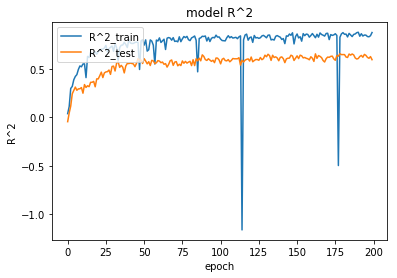

In [140]:

# plot training curve for R^2 (beware of scale, starts very low negative)


plt.plot(result1.history['r_square'])
plt.plot(result1.history['val_r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['R^2_train', 'R^2_test'], loc='upper left')
plt.show()

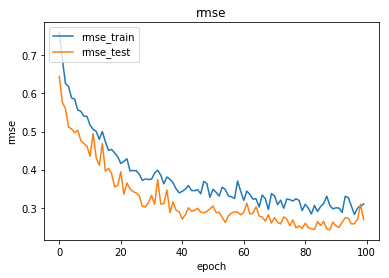

In [128]:
# plot training curve for rmse
plt.plot(result1.history['rmse'])
plt.plot(result1.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['rmse_train', 'rmse_test'], loc='upper left')
plt.show()

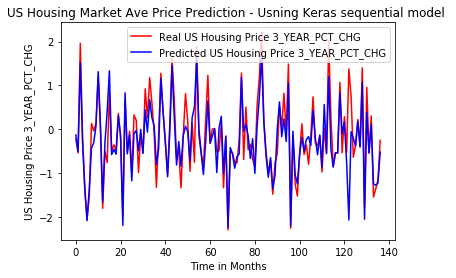

In [129]:
plt.plot(y_test, color = 'red', label = 'Real US Housing Price 3_YEAR_PCT_CHG')
plt.plot(y_pred, color = 'blue', label = 'Predicted US Housing Price 3_YEAR_PCT_CHG')
plt.title('US Housing Market Ave Price Prediction - Usning Keras sequential model ')
plt.xlabel('Time in Months')
plt.ylabel('US Housing Price 3_YEAR_PCT_CHG')
plt.legend()
plt.show()